#### Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!pip show matplotlib


Name: matplotlib
Version: 3.5.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /home/nancy/anaconda3/lib/python3.9/site-packages
Requires: packaging, cycler, pyparsing, pillow, fonttools, python-dateutil, numpy, kiwisolver
Required-by: seaborn


#### Reading data file in a dataframe

In [2]:
df=pd.read_csv('loan\loan.csv')

C:\Users\bhuta\AppData\Local\Temp\ipykernel_8948\4157995362.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan\loan.csv')


In [3]:
print("Shape of dataframe",df.shape)

Shape of dataframe (39717, 111)


In [4]:
#Looking at first 5 rows of the dataframe
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_rows', None)
null_list=df.isnull().sum()
print("number of null values in each column\n",null_list)

number of null values in each column
 id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dt

#### Removing columns with >=50% null values. 
###### Columns with large number of null values does not contribute much to analysis.

In [6]:
df.dropna(axis='columns',thresh=19858,inplace=True)

In [7]:
# Number of columns reduced to 54
df.shape

(39717, 54)

In [8]:
#Number of null values in remaining columns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Removing columns with single values because they cannot contribute to our analysis.


In [9]:
df.drop(['pymnt_plan','addr_state', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1,inplace=True)

In [10]:
#Dataframe reduced to 45 columns
df.shape

(39717, 44)

###### 1. Removing columns which do not have relevant information or we don't require for loan defaulting analysis.
###### 2. Removing columns which have post loan allotment information as we are only analyzing the data which we have information before the loan approval for loan defaulting analysis.


In [11]:
df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d","desc",'chargeoff_within_12_mths','chargeoff_within_12_mths','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt'],axis=1,inplace=True)


###### Removing column 'funded_amnt' as we have another column 'funded_amnt_inv' and we need information about how much amount is funded in actual

In [12]:
df.drop(['funded_amnt'],axis=1,inplace=True)

In [13]:
#Number of columns reduced to 17
df.shape

(39717, 16)

In [14]:
#Number of null values in the remaining columns
df.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
total_pymnt_inv           0
dtype: int64

###### Emp_length has 2.7 % null values

In [15]:
print(df['emp_length'].value_counts())
print("mode of emp_length column",df['emp_length'].mode())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
mode of emp_length column 0    10+ years
Name: emp_length, dtype: object


###### We can impute the missing values with mode i.e. "10+ years" as the 'emp_length' column is categorical.

In [16]:
#Removing rows with null values for emp_length column
df=df[~(df['emp_length'].isnull())]

###### Creating derived columns

In [17]:
#Separating date of issue column in months and year 
df['term_in_months']=df['term'].apply(lambda x: x[:-6].strip(' '))
df['issue_month']=df['issue_d'].apply(lambda x : x[:3])
df['issue_year']=df['issue_d'].apply(lambda x:x[-2:])
df.drop(['issue_d'],axis=1,inplace=True)
df.drop(['term'],axis=1,inplace=True)

In [18]:
# <1 year is assumed to be 0 and 10+ years is assumed to be 10
df['emp_length_years']=df['emp_length'].apply(lambda x:'0 years' if x=='< 1 year' else ('10 years' if x=='10+ years' else x))
df['emp_length_years']=pd.to_numeric(df['emp_length_years'].apply(lambda x : str(x).split(' ')[0]))
df.drop(['emp_length'],axis=1,inplace=True)

In [19]:
#Removing percentage sign from interest rate column
df['int_rate_percentage'] = df['int_rate'].str.rstrip('%')
df.drop(['int_rate'],axis=1,inplace=True)
#Making issue_year column from 11 to 2011 i.e. adding 20 in front
df['issue_year'] = '20' +df['issue_year']

In [20]:
#Removing letters from subgrade column as we already have the first letter of sub grade in grade column
df['sub_grade']=pd.to_numeric(df['sub_grade'].apply(lambda x: x[-1]))

In [21]:
#Dividing annual income by 1000 giving annual income = annual_inc_in_thousands*1000
df['annual_inc_in_thousands'] = df['annual_inc'] / 1000
df.drop(['annual_inc'],axis=1,inplace=True)

###### We can remove the loans with loan_status as "current" as we are doing loan defaulting analysis i.e. we analyze is the loan should be funded to a new member. So, only the completed loans i.e. Charged off or fully paid can provide information about the who is likely to default. 

In [22]:
# We remove rows with 'current' loan status
df=df[~(df['loan_status']=='Current')]


In [23]:
df.shape

(37544, 17)

In [24]:
df.head()


,loan_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,dti,total_pymnt_inv,term_in_months,issue_month,issue_year,emp_length_years,int_rate_percentage,annual_inc_in_thousands
0,5000,4975.0,162.87,B,2,RENT,Verified,Fully Paid,credit_card,27.65,5833.84,36,Dec,2011,10,10.65,24.000
1,2500,2500.0,59.83,C,4,RENT,Source Verified,Charged Off,car,1.00,1008.71,60,Dec,2011,0,15.27,30.000
2,2400,2400.0,84.33,C,5,RENT,Not Verified,Fully Paid,small_business,8.72,3005.67,36,Dec,2011,10,15.96,12.252
3,10000,10000.0,339.31,C,1,RENT,Source Verified,Fully Paid,other,20.00,12231.89,36,Dec,2011,10,13.49,49.200
5,5000,5000.0,156.46,A,4,RENT,Source Verified,Fully Paid,wedding,11.20,5632.21,36,Dec,2011,3,7.90,36.000


#### We have 37544 rows and 17 columns after cleaning the data

##### Checking for outliers and removing them outliers

C:\Users\bhuta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


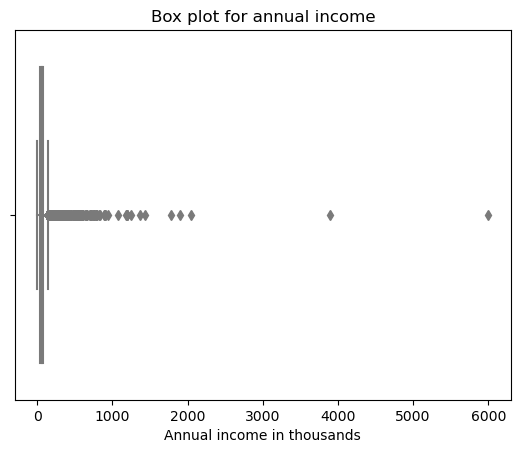

In [25]:
sns.set_palette("pastel")
sns.boxplot(df['annual_inc_in_thousands']).set(title='Box plot for annual income')
plt.xlabel('Annual income in thousands')
plt.show()

##### We can clearly see that there are large number of outliers and they are far from the upper limit.

In [26]:
#Checking for quantiles of the annual income column
quantile_info = df['annual_inc_in_thousands'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     60.0000
0.75     83.0000
0.90    116.6724
0.95    142.0000
0.97    166.2130
0.98    189.9960
0.99    235.0000
Name: annual_inc_in_thousands, dtype: float64

In [27]:
#Keeping values for 95th percentile
updated_annual_inc =df['annual_inc_in_thousands'].quantile(0.95)
df = df[df['annual_inc_in_thousands'] <= updated_annual_inc]

C:\Users\bhuta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


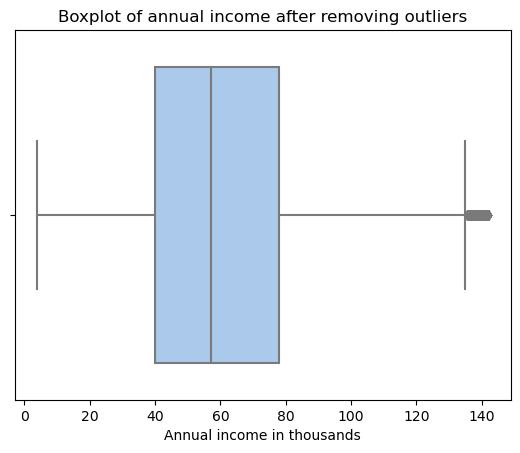

In [28]:
#Plotting boxplot after removing outliers
sns.boxplot(df['annual_inc_in_thousands']).set(title='Boxplot of annual income after removing outliers')
plt.xlabel('Annual income in thousands')
plt.show()

##### INFERENCE: Outliers have been removed and annual incomes do not have extremely high values now.

###### Univariate Analysis

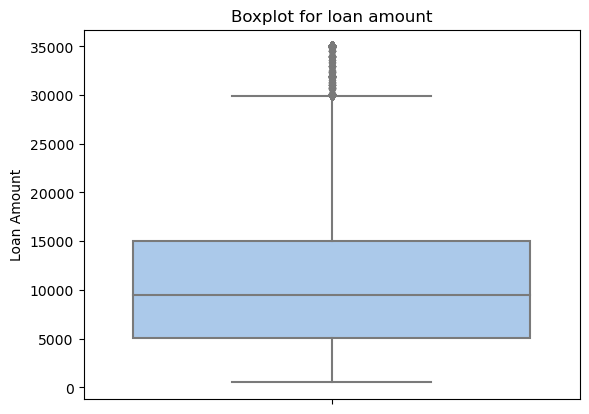

In [29]:
sns.boxplot( y=df["loan_amnt"] ).set(title='Boxplot for loan amount')
plt.ylabel('Loan Amount')
plt.show()



##### INFERENCE: The loan amount varies from 0 to 35,000 and mean of 10,000. 


##### There are some outliers which are in continuation with the upper limit and not very high from the upper range so we don't remove them.

In [30]:
df['loan_status'].value_counts()

Fully Paid     30479
Charged Off     5196
Name: loan_status, dtype: int64

##### INFERENCE: Most of the loans are fully paid, around 14% of the loans are in charged off category

Text(0, 0.5, 'Annual income in thousands')

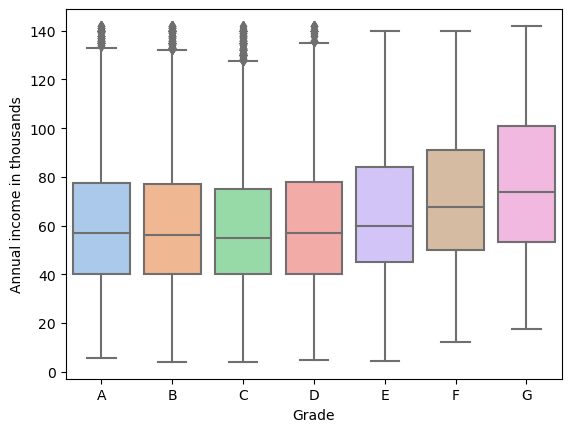

In [31]:

sns.boxplot(x=df['grade'],y=df['annual_inc_in_thousands'],order=['A','B','C','D','E','F','G'])
plt.xlabel('Grade')
plt.ylabel('Annual income in thousands')



##### Not much dependency can be seen for annual_income and grades.  People with higher mean annual income tend to have loan in grades F,E,G 

In [32]:
#Converting interest rate percentage to float datatype
df['int_rate_percentage']=pd.to_numeric(df['int_rate_percentage'])

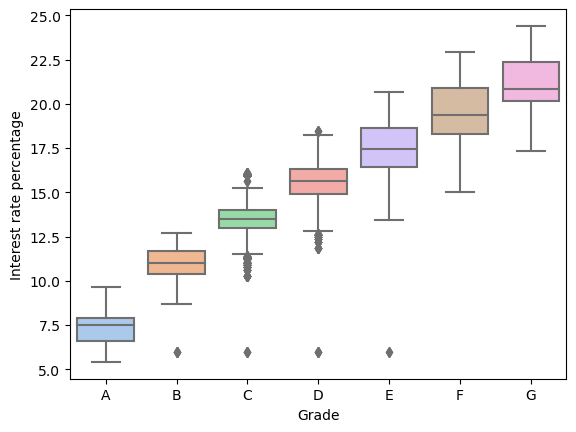

In [33]:
sns.boxplot(y='int_rate_percentage', x='grade', data=df,order=['A','B','C','D','E','F','G'])
plt.xlabel('Grade')
plt.ylabel('Interest rate percentage')
plt.show()

#### Inference - Grade moves from A to G as mean value of interest rate increases


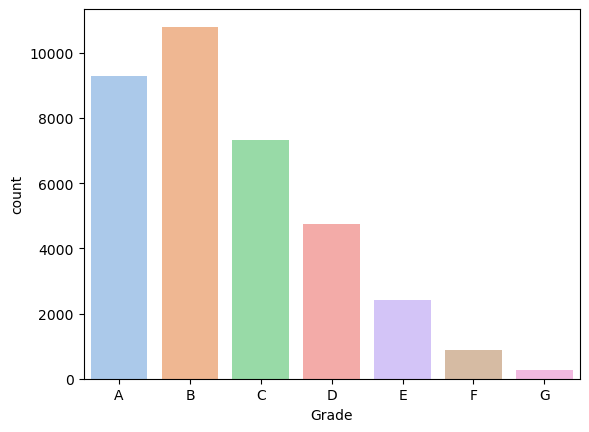

In [34]:
sns.countplot(x='grade', data=df,order=['A','B','C','D','E','F','G'])
plt.xlabel('Grade')
plt.show()

##### INFERENCE: More people invest in grades A,B,C than D,E,F,G. It almost gradually moves from A to G leaving B as exception. This means more people tend to take loans with lower interest rates as interst rates decreases as we move from grade A to G which seems rational.

In [35]:
df['home_ownership'].value_counts()

RENT        17638
MORTGAGE    15289
OWN          2652
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

##### We will now look at defaulters of the loan i.e. 'Charged off' category based on which we make decisions on whether to give loan to a new member or not.

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

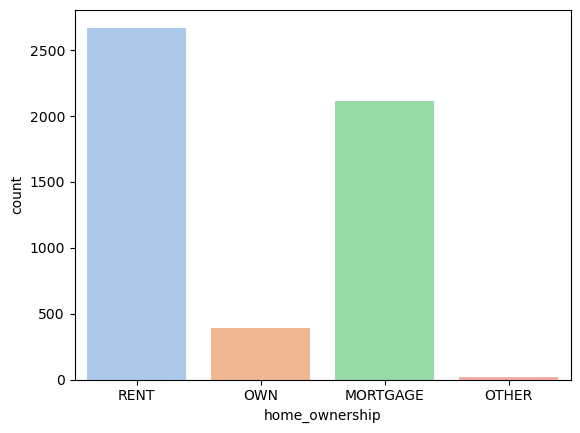

In [36]:

sns.countplot(x='home_ownership', data=df[df['loan_status']=='Charged Off'])


##### Inference: People who own home have least chances of being defaulters. Borrowers with rental home have highest chances of being defaulter.

<AxesSubplot:xlabel='issue_year', ylabel='count'>

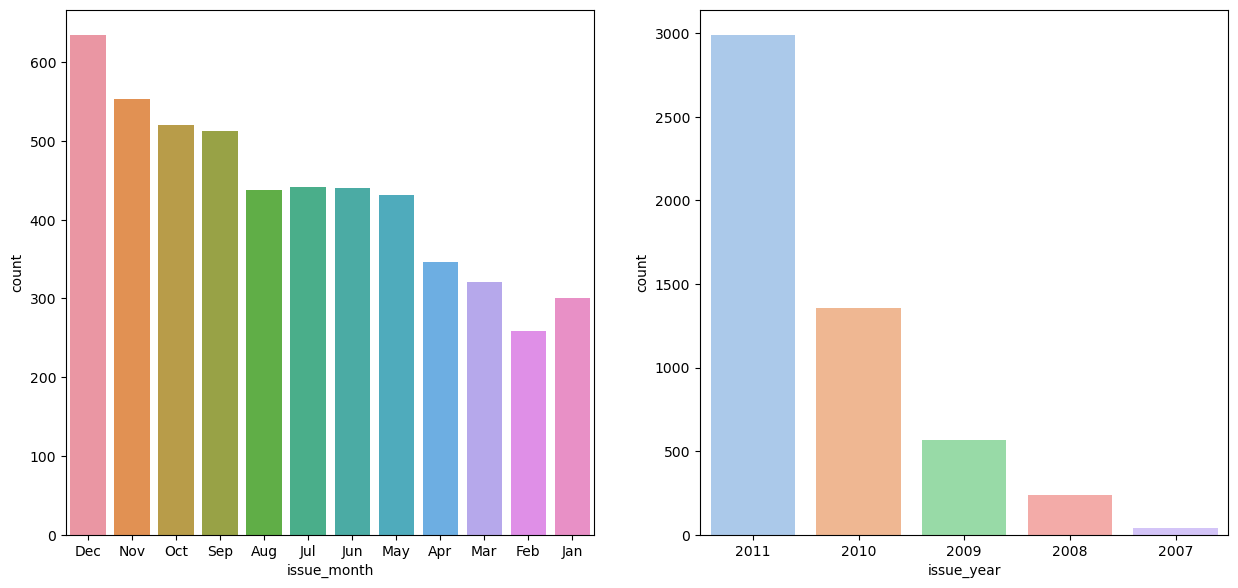

In [37]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=df[df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=df[df['loan_status']=='Charged Off'])

##### Inference:Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 is also compared to other years and have maximum number of defaulters.

In [38]:
df['term_in_months'].value_counts()
#There are more loans for 36 installments than for 60 installments.

36    26953
60     8722
Name: term_in_months, dtype: int64

In [39]:
##### INFERENCE: People are interested to pay less number of loan payments i.e. they prefer shorter tenure loans 

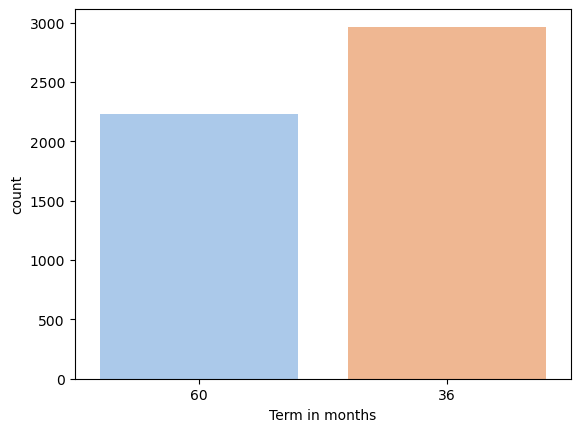

In [40]:
sns.countplot( x="term_in_months", data=df[df['loan_status']=='Charged Off'])
plt.xlabel('Term in months')
plt.show()

##### Inference:  people with 36 months as loan term tend to default at higer frequency.

In [41]:
df['grade'].value_counts()

B    10801
A     9276
C     7324
D     4736
E     2407
F      869
G      262
Name: grade, dtype: int64

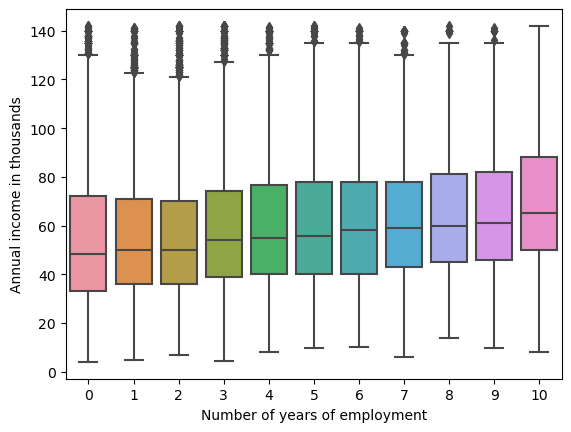

In [42]:
sns.boxplot(x=df['emp_length_years'],y=df['annual_inc_in_thousands'])
plt.xlabel('Number of years of employment')
plt.ylabel('Annual income in thousands')
plt.show()

##### INFERENCE: Mean value of income increases as number of employment years increases

<AxesSubplot:xlabel='grade', ylabel='count'>

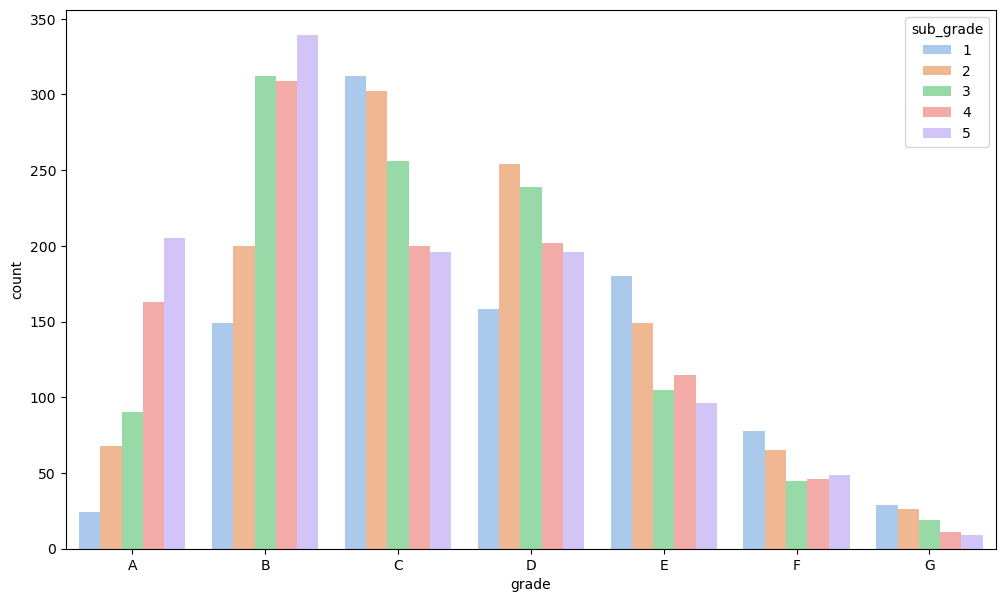

In [43]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df[df['loan_status'] == 'Charged Off'])


##### INFERENCE: Grade B5 has highest number of defaults

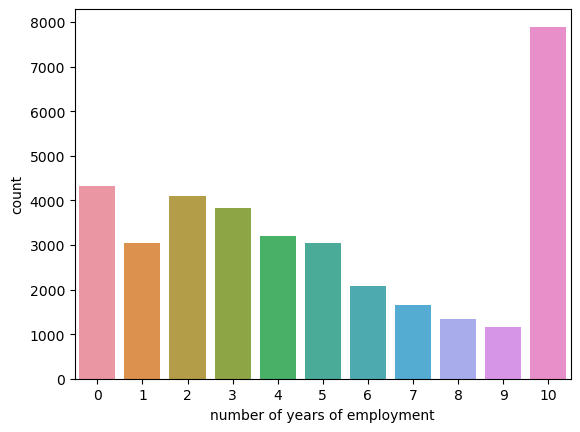

In [44]:
sns.countplot( x="emp_length_years", data=df)
plt.xlabel('number of years of employment')
plt.show()


##### INFERENCE: Distribution of number of loans across number of employment years is imbalanced. People with 10 + years of experience are  more likely to take loans . Major reason could be a person with 10+ years of experience lies in the age group of >32 , people in this age group have more resposibilities and require financial aid through loans.


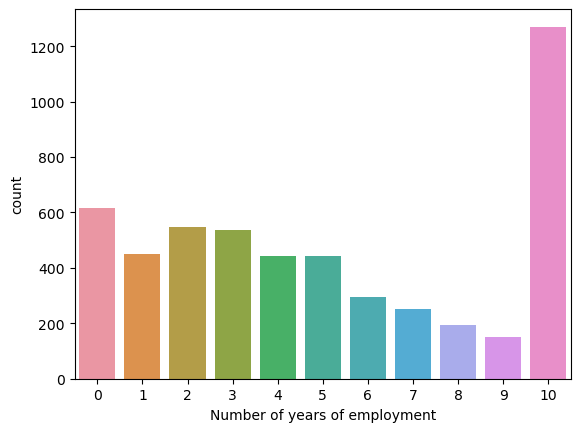

In [45]:
sns.set_palette('pastel')
sns.countplot(x="emp_length_years",data=df[df['loan_status']=='Charged Off'])
plt.xlabel('Number of years of employment')
plt.show()

##### INFERENCE: A person with 10  or more than 10 years of experience have higher chances of laon being charged off 

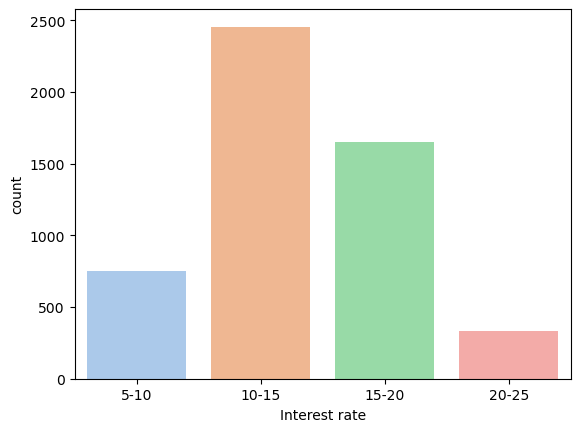

In [46]:
#Binning interest rate column in 4 bins.
df['int_rate_groups'] = pd.cut(df['int_rate_percentage'], bins=4,precision =0,labels=['5-10','10-15','15-20','20-25'])
sns.countplot(x='int_rate_groups', data=df[df.loan_status == 'Charged Off'])
plt.xlabel('Interest rate')
plt.show()

#### Inference: Loans with Interest rates in 10-15 bin have higher defaults.

In [47]:
#Checking range of annual income column
df['annual_inc_in_thousands'].describe()

count    35675.000000
mean        61.458272
std         27.774493
min          4.000000
25%         40.000000
50%         57.000000
75%         78.000000
max        142.000000
Name: annual_inc_in_thousands, dtype: float64

In [48]:
#Binning annual income column , making it a categorical variable.
df['annual_inc_in_thousands'] = pd.cut(df['annual_inc_in_thousands'], bins=7,precision =0,labels =['4-22','22-40','40-76','76-94','94-112','112-130','130-148'])



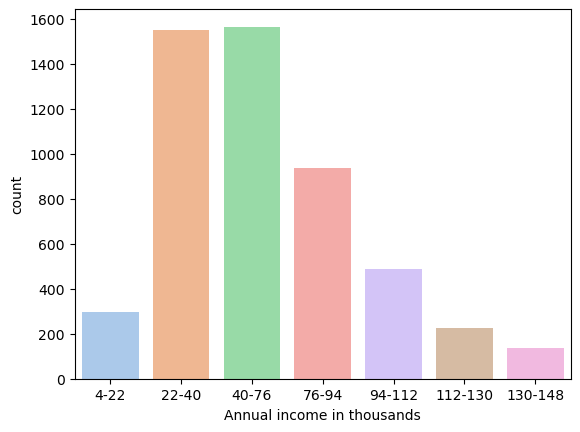

In [49]:
sns.countplot(x='annual_inc_in_thousands', data=df[df['loan_status']=='Charged Off'])
plt.xlabel('Annual income in thousands')
plt.show()

#### INFERENCE- People with annual income in range 22k to 76k are more probable to be defaulters.

In [50]:
#Checking maximum and minimum fro debt to income ratio
df['dti'].describe()

count    35675.000000
mean        13.457463
std          6.649145
min          0.000000
25%          8.370000
50%         13.590000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

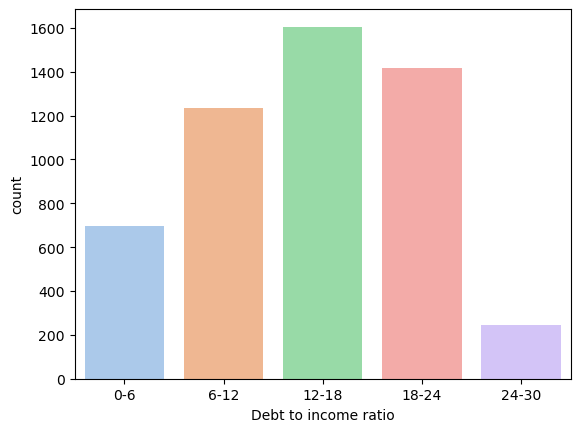

In [51]:
#Binning debt to inncome ratio and making it a categorical variable
df['dti_groups'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
sns.countplot(x='dti_groups', data=df[df['loan_status']=='Charged Off'])
plt.xlabel('Debt to income ratio')
plt.show()

#### INFERENCE: People with debt to income ratio in range 6 to 24 have higher chances of being in Charged Off category where 12-18 debt range has the highest chances of being default 

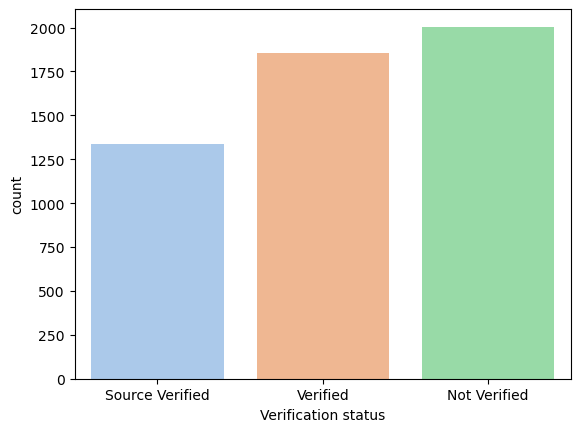

In [52]:
sns.countplot(x='verification_status',data=df[df['loan_status']=='Charged Off'])
plt.xlabel('Verification status')
plt.show()

#### INFERENCE: Least number of charge offs happen for source verified as the application is verified by a known source and  maximum charge offs happen for non verified applications .


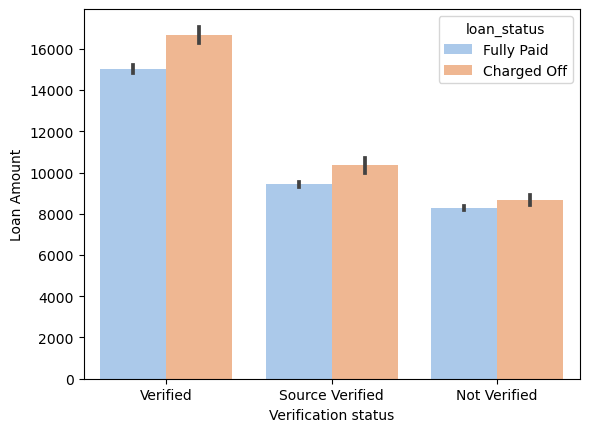

In [56]:
sns.barplot(data =df,y='loan_amnt', x='verification_status', hue ='loan_status')
plt.xlabel('Verification status')
plt.ylabel('Loan Amount')
plt.show()

#### INFERENCE: Verified loan applications have higher mean loan amount.This implies that the firms are first verifying the loans with higher values.

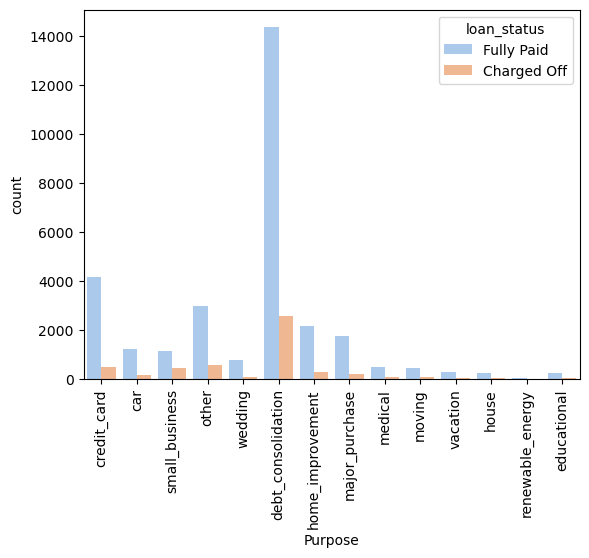

In [53]:
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.show()


##### Inference: Majority of loan has been given for the debt consolidation purpose and has been majorly fully paid.People having debt reasanably takes more loans as compared to other purposes. 

